1.	Prédiction des prix des actions : On veut prédire la valeur future d'une action en se basant sur ses prix passés et les actualités financières.

o	C’est de l’apprentissage supervisé : les prix des actions sont labélisés et à partir des actualités financières, on peut créer une colonne avec lles tendances en pourcantage

2.	Organisation d'une bibliothèque : On souhaite regrouper automatiquement des milliers de livres en différentes catégories (science-fiction, histoire, romance...) sans savoir à l'avance quelles sont toutes les catégories possibles

o	C’est de l’apprentissage non supervisé, il n’ ya pas de feature labélisé. Ce qui est possible serait de créer des clusters par catégorie

3.	Programmer un robot aspirateur : On veut apprendre à un robot à nettoyer une pièce le plus efficacement possible en le récompensant quand il nettoie une nouvelle zone et en le pénalisant quand il se cogne contre un mur.

o	C’est de l’apprentissage par renforcement. Si le robot nettoie une zone qu’il n’avait pas encore nettoyée, on lui donne un point et s’il cogne un mur, on lui retire un point. La méthode carotte et bâton est caractéristique ce cet apprentissage 

 Exercice 2 : 

L’âge
la valeur des emprunts existant
le salaire
le montant de l’épargne
S’il a des maladies avéreés

1.	Imaginer les Sources de Données : 
La banque pourrait demande au client de remplir un formulaire de demande de prêt, les derniers relevés de compte du client et un bilan médical

  Exercice 3 : Comment Savoir si Votre Modèle est Performant ?


1. Modèle de classification (supervisé) – Prédiction de prêt
Métriques d'évaluation :
•	Exactitude :  c’est le pourcentage de prêts correctement acceptés ou refusés.
•	Précision : parmi les prêts acceptés, quelle proportion sera réellement remboursée
•	Pour une banque, il serait plus grave d’accepter un mauvais payeur (faux positif) que de refuser un bon client (faux négatif), car cela entraîne des pertes directes, des frais pour récupérer l’argent que la banque aurait prété

2. Organisation de livres
•	Méthode du coude : du regroupement avec la méthode K, K étant le nombre de voisin analysé. (visuel avec les cercles)
•	Score de silhouette : cela permet de mesurer à quel point les livres ressemblent bien aux livres voisins

3. Modèle par renforcement – Robot aspirateur
•	Plus le robot optimise ses actions (nettoyage efficace, moins de collisions), plus la récompense augmente.
•	Plus le temps de nettoyage est court à surface identique, plus la récompense augmente
•	Plus la surface augmente à temp identique, plus  la récompense augmente 


In [40]:
# %% [markdown]
# # Analyse des prêts bancaires - De l'exploration à la modélisation

# %% [markdown]
# ## 1. Importation des librairies
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Configuration de l'affichage
pd.set_option('display.float_format', '{:.2f}'.format)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


# ## 2. Chargement des données

df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
print("Dimensions du dataset :", df.shape)
df.head()



Dimensions du dataset : (614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.00,141.00,360.00,1.00,Urban,Y


3. Exploration et Nettoyage des données


In [41]:
# Vérification des valeurs manquantes

print("Valeurs manquantes par colonne:")
print(df.isnull().sum())

#Traitement des valeurs manquantes

# Colonnes catégorielles
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Colonnes numériques
num_cols = ['LoanAmount']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Vérification
print("\nAprès traitement des NA:")
print(df.isnull().sum())

# Préparation des features

df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})


# Conversion des variables catégorielles

df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)
df.head()

Valeurs manquantes par colonne:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Après traitement des NA:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


C:\Users\Zbook\AppData\Local\Temp\ipykernel_20904\3404491368.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\Zbook\AppData\Local\Temp\ipykernel_20904\3404491368.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,5849,0.00,128.00,360.00,1.00,1,5849.00,True,False,False,False,False,True
1,LP001003,1,4583,1508.00,128.00,360.00,1.00,0,6091.00,True,True,False,False,False,False
2,LP001005,0,3000,0.00,66.00,360.00,1.00,1,3000.00,True,True,False,True,False,True
3,LP001006,0,2583,2358.00,120.00,360.00,1.00,1,4941.00,True,True,True,False,False,True
4,LP001008,0,6000,0.00,141.00,360.00,1.00,1,6000.00,True,False,False,False,False,True


4. Analyse exploratoire (EDA)

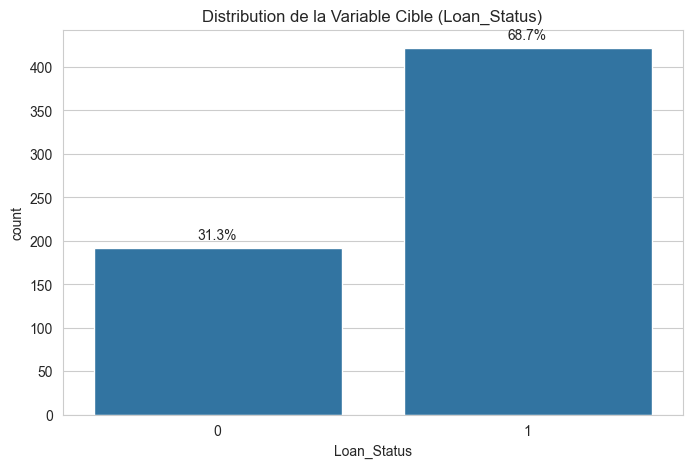

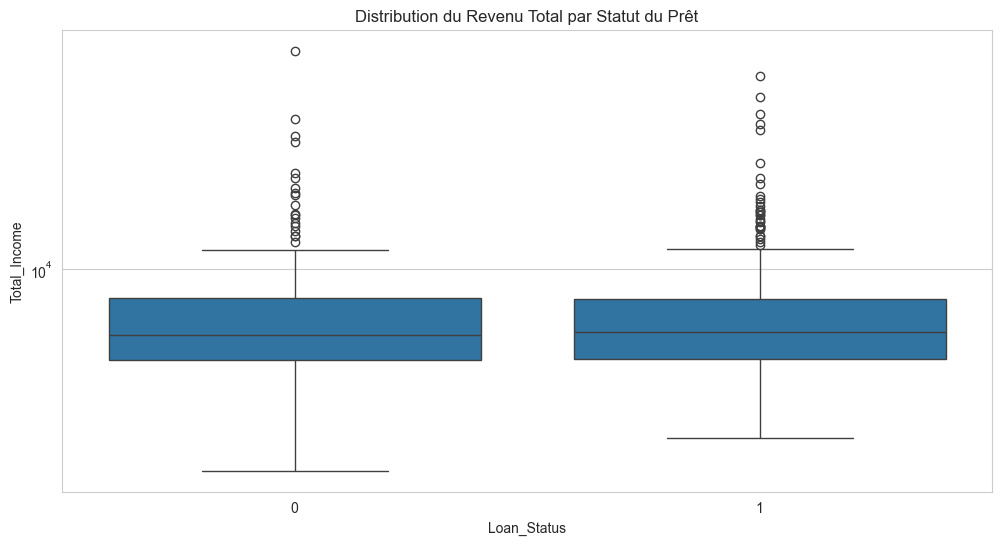

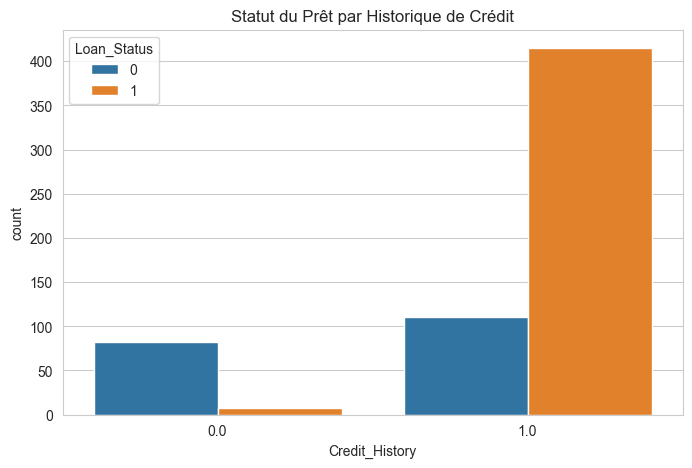

In [42]:
#Distribution de la variable cible

plt.figure(figsize=(8,5))
ax = sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution de la Variable Cible (Loan_Status)')
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

#Relation entre revenu et statut du prêt

plt.figure(figsize=(12,6))
sns.boxplot(x='Loan_Status', y='Total_Income', data=df)
plt.yscale('log')
plt.title('Distribution du Revenu Total par Statut du Prêt')
plt.show()


# Impact de l'historique de crédit

plt.figure(figsize=(8,5))
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Statut du Prêt par Historique de Crédit')
plt.show()


Préparation des données pour le modèle

In [43]:
#Sélection des features

features = ['Credit_History', 'LoanAmount', 'Total_Income', 'Loan_Amount_Term', 
           'Gender_Male', 'Married_Yes', 'Education_Not Graduate', 
           'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']
X = df[features]
y = df['Loan_Status']


# Normalisation des données
scaler = StandardScaler()
cols_to_scale = ['LoanAmount', 'Total_Income', 'Loan_Amount_Term']
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


#  Split des données

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


C:\Users\Zbook\AppData\Local\Temp\ipykernel_20904\2324821740.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])


Modélisation

In [44]:


# Régression Logistique

log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("Régression Logistique:")
print(classification_report(y_test, y_pred_log))
print("Matrice de Confusion:")
print(confusion_matrix(y_test, y_pred_log))

# 6.2 Random Forest

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("Matrice de Confusion:")
print(confusion_matrix(y_test, y_pred_rf))

Régression Logistique:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        58
           1       0.85      0.85      0.85       127

    accuracy                           0.79       185
   macro avg       0.76      0.76      0.76       185
weighted avg       0.79      0.79      0.79       185

Matrice de Confusion:
[[ 39  19]
 [ 19 108]]

Random Forest:
              precision    recall  f1-score   support

           0       0.65      0.62      0.64        58
           1       0.83      0.85      0.84       127

    accuracy                           0.78       185
   macro avg       0.74      0.74      0.74       185
weighted avg       0.78      0.78      0.78       185

Matrice de Confusion:
[[ 36  22]
 [ 19 108]]


7. Comparaison des modèles

In [45]:
results = pd.DataFrame({
    'Modèle': ['Régression Logistique', 'Random Forest'],
    'Exactitude': [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_rf)],
    'Précision (N)': [
        classification_report(y_test, y_pred_log, output_dict=True)['0']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['0']['precision']
    ],
    'Rappel (N)': [
        classification_report(y_test, y_pred_log, output_dict=True)['0']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['0']['recall']
    ]
})

display(results)

,Modèle,Exactitude,Précision (N),Rappel (N)
0,Régression Logistique,0.79,0.67,0.67
1,Random Forest,0.78,0.65,0.62
